#Problem Statement:
Lithionpower is the largest provider of electric vehicle batteries.
It provides battery on a rental model to e-vehicle drivers. Drivers rent battery typically for a day and then replace it with a charged battery
from the company. Lithionpower has a variable pricing model based on the driver's driving history. Battery life depends on factors like
overspeeding, distance driven per day, and so on.
#Objective:
Create a cluster model where drivers can be grouped together based on their driving data. Group the data points so that drivers will be
incentivized based on the cluster.
#Data Dictionary
For the sake of simplicity, you will take only two features such as mean distance driven per day and the mean percentage of time when a
driver was more than 5 mph over the speed limit.
Here are what the data represent:
id: Unique ID of the driver
mean_dist_day: Mean distance driven by driver per day
mean_over_speed_perc: Mean percentage of time when a driver was more than 5 mph over the speed limit

1.   id: Unique ID of the driver
2.   mean_dist_day: Mean distance driven by driver per day
3.   mean_over_speed_perc: Mean percentage of time when a driver was more than 5 mph over the speed limit




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('/content/drive/MyDrive/machine learning/machine learning/Datasets/OSL Datasets/Lesson_5/Datasets/driver-data.csv')

In [4]:
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [5]:
#check the no of column and rows and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB




*   The dataframe's information is printed using the info() function.


#Finding and Treating Null Values

In [7]:
df.isnull().sum(axis=0)

id                      0
mean_dist_day           0
mean_over_speed_perc    0
dtype: int64

#Check Data Types

In [10]:
df.dtypes

id                        int64
mean_dist_day           float64
mean_over_speed_perc      int64
dtype: object



*  To check the type of data, you can use dtypes method.




#visuvalize the data points

Text(0, 0.5, 'mean_over_speed_perc')

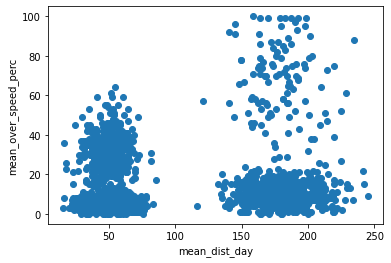

In [12]:
plt.scatter(df['mean_dist_day'],df['mean_over_speed_perc'])
plt.xlabel('mean_dist_day')
plt.ylabel('mean_over_speed_perc')

Now we have to cluster the data points that we can group or label in different categories, and this is where K-Means Clustering comes into
the picture.

#Therodical understanding
https://www.javatpoint.com/k-means-clustering-algorithm-in-machine-learning

Many clustering algorithms are available in Scikit-Learn and elsewhere, but the simplest to understand is k-means clustering, which is
implemented in sklearn.cluster.KMeans .


In [13]:
from sklearn.cluster import KMeans

You are importing K-means which means k-means algorithm searches for a pre-determined number of clusters within an unlabeled
multidimensional dataset.


##Run the Algorithm with K=3


Fit the model to all the data, except for the ID label.


In [14]:
km=KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['mean_dist_day','mean_over_speed_perc']])
y_predicted

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

###Add the Predicted Clusters Column to the Dataset

In [15]:
df['cluster']=y_predicted
df.sample(5)

,id,mean_dist_day,mean_over_speed_perc,cluster
2425,3423312048,41.31,5,0
2988,3423310984,39.64,4,0
3862,3423311215,190.28,10,1
326,3423310837,62.65,41,0
2926,3423312202,48.71,5,0


###Get the Coordinates of Cluster Centers

In [16]:
km.cluster_centers_

array([[ 50.04763438,   8.82875   ],
       [180.34311782,  10.52011494],
       [177.83509615,  70.28846154]])

In [20]:
km.cluster_centers_[:,1]

array([ 8.82875   , 10.52011494, 70.28846154])

###Plot the Clusters with their Centroids

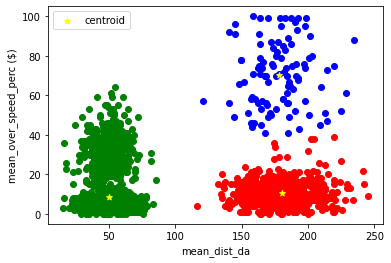

In [21]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1['mean_dist_day'],df1['mean_over_speed_perc'],color='green')
plt.scatter(df2['mean_dist_day'],df2['mean_over_speed_perc'],color='red')
plt.scatter(df3['mean_dist_day'],df3['mean_over_speed_perc'],color='blue')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='yellow',marker='*',label='centroid')
plt.xlabel('mean_dist_da')
plt.ylabel('mean_over_speed_perc ($)')
plt.legend()


In [18]:
df1=df[df.cluster==0]
df1

,id,mean_dist_day,mean_over_speed_perc,cluster
0,3423311935,71.24,28,0
1,3423313212,52.53,25,0
2,3423313724,64.54,27,0
3,3423311373,55.69,22,0
4,3423310999,54.58,25,0
...,...,...,...,...
3195,3423312761,47.56,5,0
3196,3423314346,39.39,8,0
3197,3423313451,46.85,7,0
3198,3423313552,37.68,7,0


#Decide the Optimal Number of Clusters
Now, the next question that comes to our mind is how to determine the number of clusters. In our dataset, we got an intuition. However,
for a larger dataset, it is hard to determine the number of clusters.
To overcome this shortcoming, there is a method called elbow method.
#What Is Elbow Method?
It's a popular technique that involves running k-means clustering for a set of k clusters (let's say 1 to 10) and calculating the sum of
squared distances from each point to its assigned center (inertia).
When the inertias are plotted and the plot looks like an arm, the “elbow” (the point of inflection on the curve) is the best value of k.


Take k = 1 to 10 and append them in a list

In [22]:
sse=[]
k_rng = range(1,10)
for k in k_rng:
  km=KMeans(n_clusters=k)
  km.fit(df[['mean_dist_day','mean_over_speed_perc']])
  sse.append(km.inertia_)

###List Down the Inertias


In [23]:
sse

[12184626.12962798,
 1316420.8509477177,
 992634.0606702471,
 719601.5383469043,
 534638.7250606334,
 372841.1452326999,
 319748.80768837465,
 276882.24147826014,
 252733.56574999547]

###Plot the Elbow

Text(0, 0.5, 'Sum of squared error')

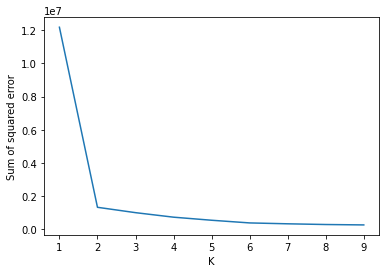

In [27]:
plt.plot(k_rng,sse)
plt.xlabel('K')
plt.ylabel('Sum of squared error')

The point of inflection in the elbow plot is 2, so we know now that the optimal number of the clusters for the data points is 2

In [28]:
km=KMeans(n_clusters=2)
y_predicted = km.fit_predict(df[['mean_dist_day','mean_over_speed_perc']])
y_predicted

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [29]:
df['cluster']=y_predicted
df.sample(5)

,id,mean_dist_day,mean_over_speed_perc,cluster
922,3423311971,49.53,7,0
937,3423311694,44.65,6,0
3288,3423312173,202.02,38,1
1697,3423314370,55.75,3,0
1681,3423311412,42.73,5,0


In [30]:
km.cluster_centers_

array([[ 50.04763438,   8.82875   ],
       [180.017075  ,  18.29      ]])

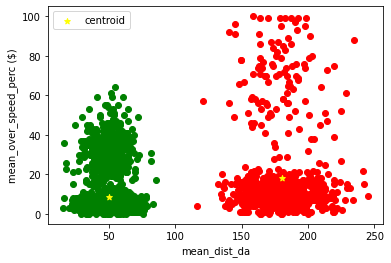

In [31]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]


plt.scatter(df1['mean_dist_day'],df1['mean_over_speed_perc'],color='green')
plt.scatter(df2['mean_dist_day'],df2['mean_over_speed_perc'],color='red')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='yellow',marker='*',label='centroid')
plt.xlabel('mean_dist_da')
plt.ylabel('mean_over_speed_perc ($)')
plt.legend()
